In [1]:
from model import Model, Actions
from plot_vp import plot_vp
from policy_iteration import policy_iteration
from value_iteration import value_iteration, value_iteration_async
from sarsa import sarsa, expected_sarsa
from q_learning import q_learning
from world_config import cliff_world, grid_world, small_world
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from scipy.ndimage.filters import uniform_filter1d

plt.tight_layout()

/var/folders/pk/pw1_b29x4xxgr4txkszp_3ph0000gn/T/ipykernel_39121/3306625880.py:11: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


<Figure size 640x480 with 0 Axes>

## Policy Iteration

  9%|▉         | 9/100 [00:06<01:09,  1.31it/s]


breaking


  5%|▌         | 5/100 [00:00<00:01, 60.03it/s]

breaking



 12%|█▏        | 12/100 [00:01<00:12,  7.32it/s]


breaking


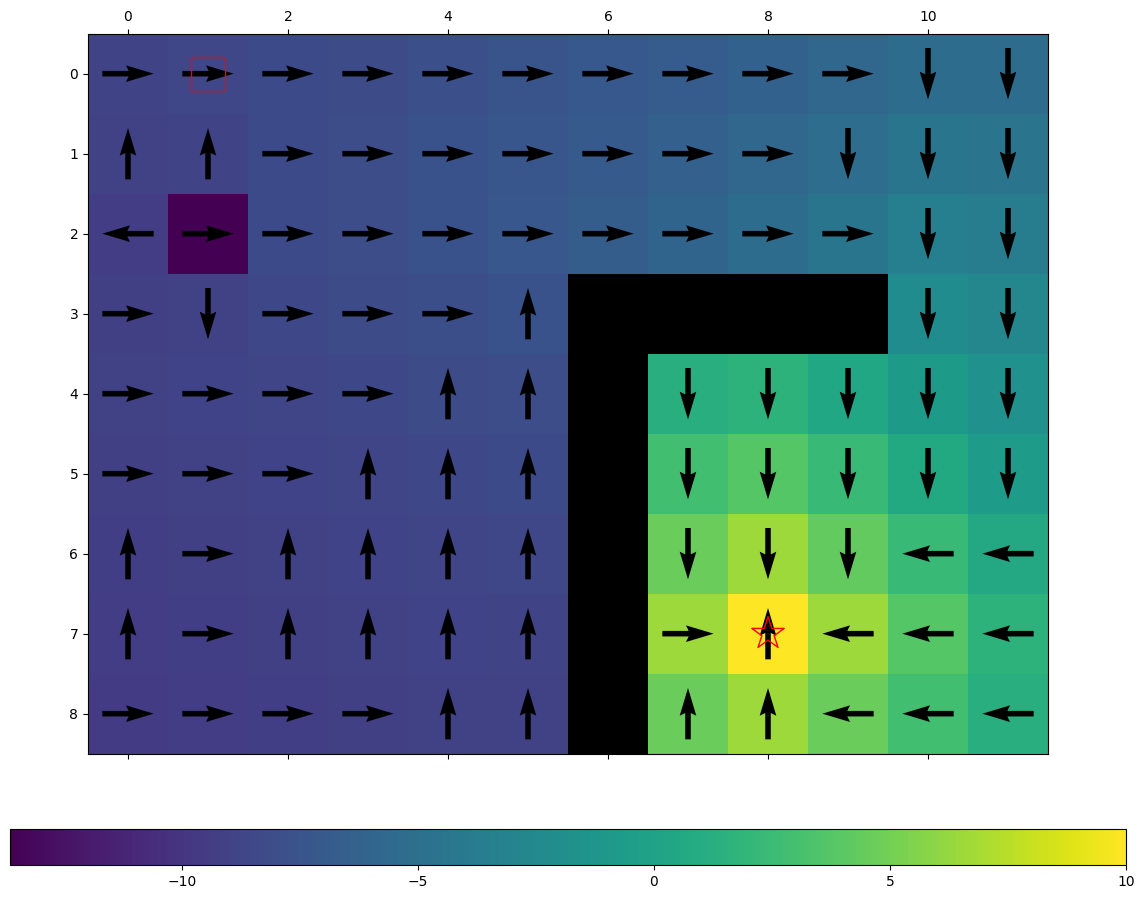

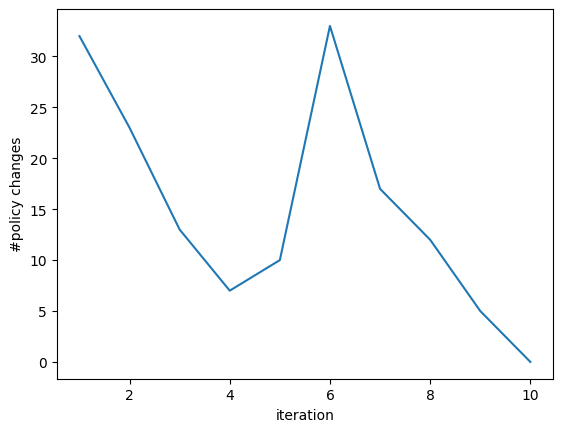

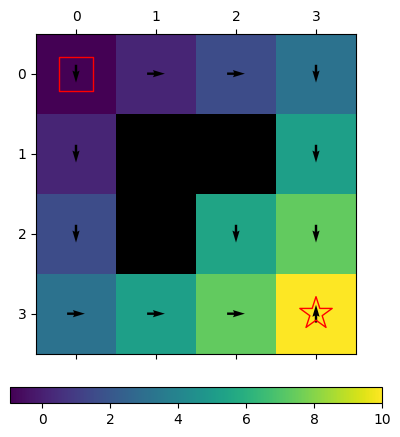

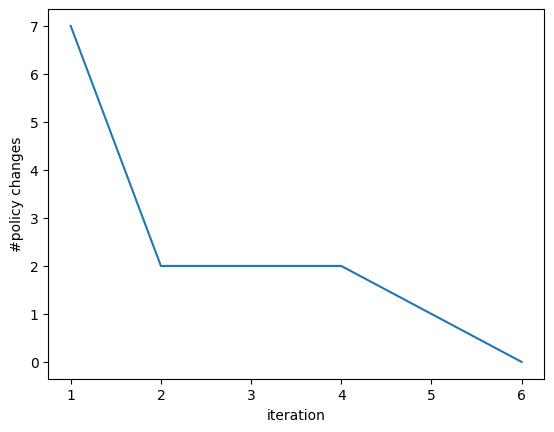

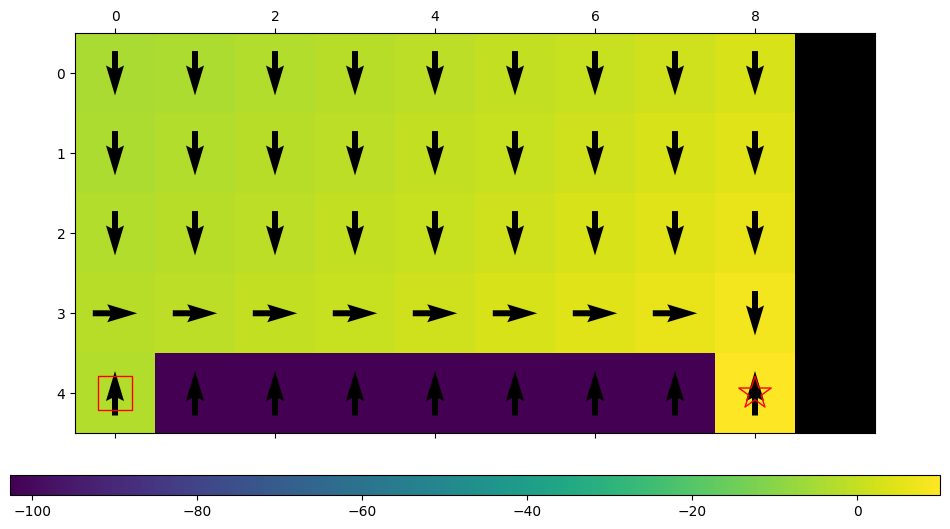

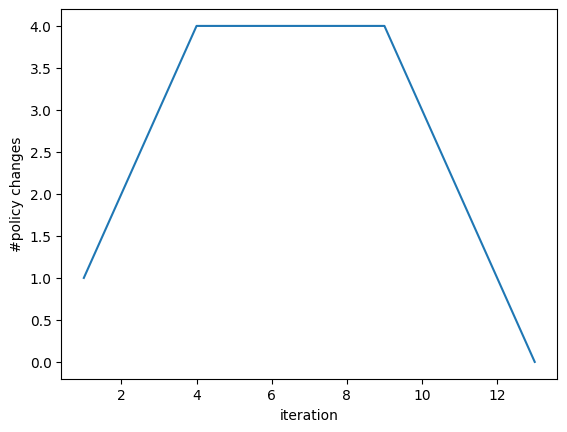

In [8]:
worlds = [grid_world, small_world, cliff_world]
names = ['grid_world', 'small_world', 'cliff_world']
for i, world in enumerate(worlds):
    model = Model(world)
    V_PI, pi_PI, history = policy_iteration(model)
    plot_vp(model, V_PI, pi_PI)
    plt.savefig('plots/PI-{}.png'.format(names[i]))
    plt.figure()
    plt.plot(np.arange(1, len(history)), [np.sum(history[i] != history[i - 1]) for i in range(1, len(history))])
    plt.xlabel('iteration')
    plt.ylabel('#policy changes')
    plt.savefig('plots/PI-{}-convergence.png'.format(names[i]))

## Q1 - Value Iteration

### 1. Sychronize

 13%|█▎        | 13/100 [00:00<00:04, 21.47it/s]


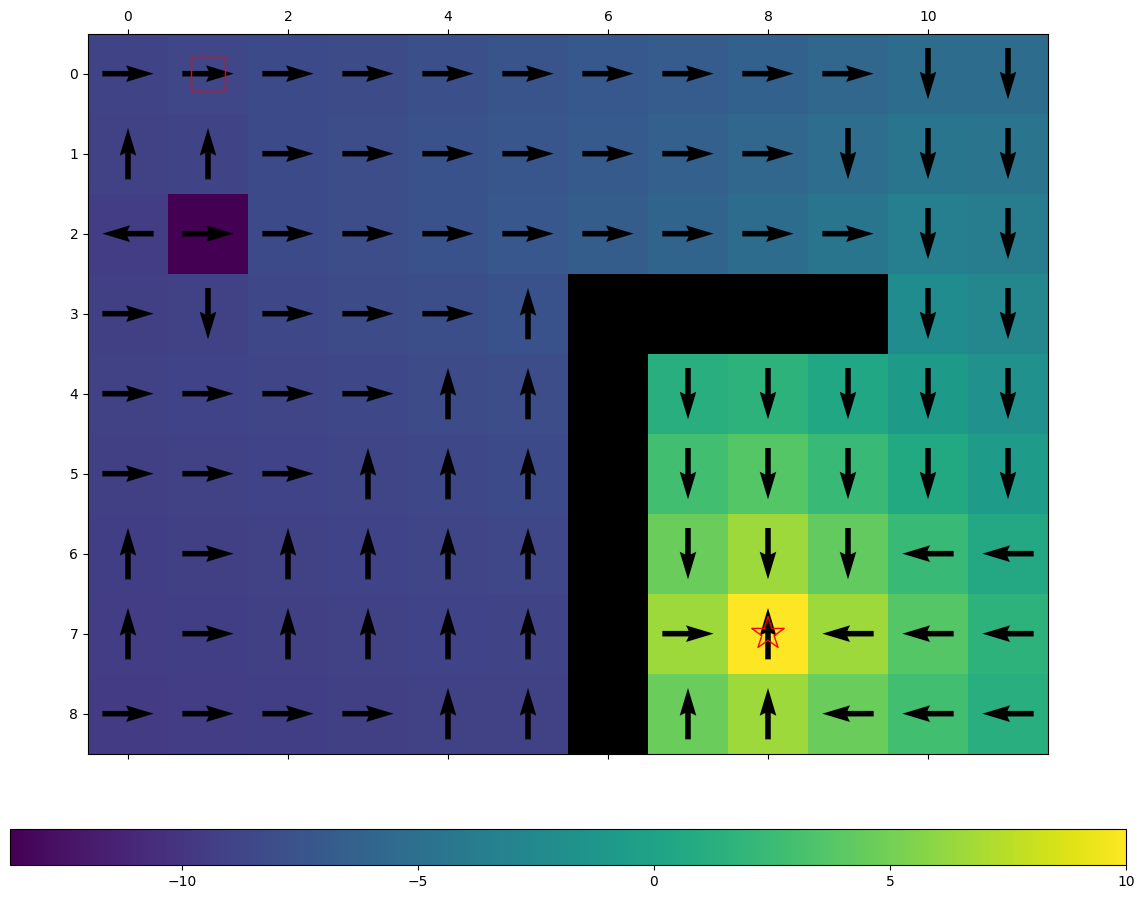

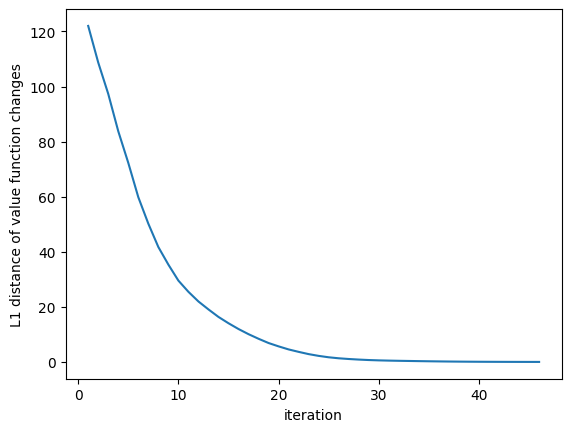

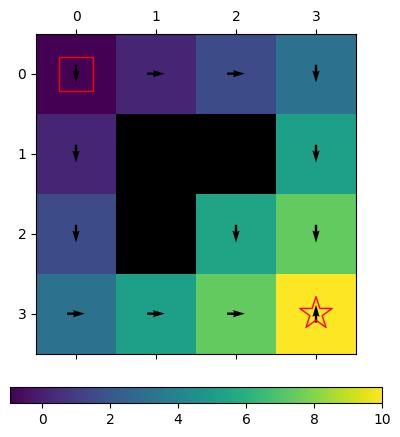

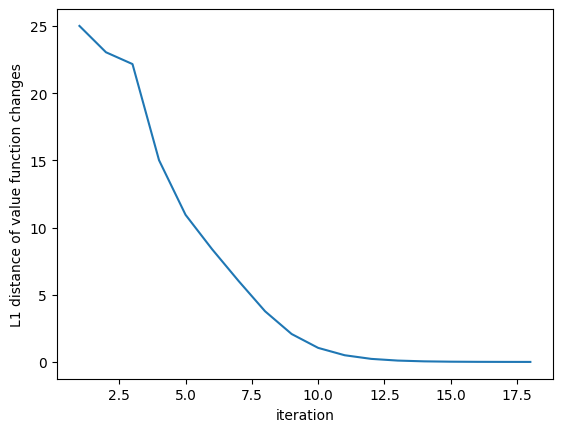

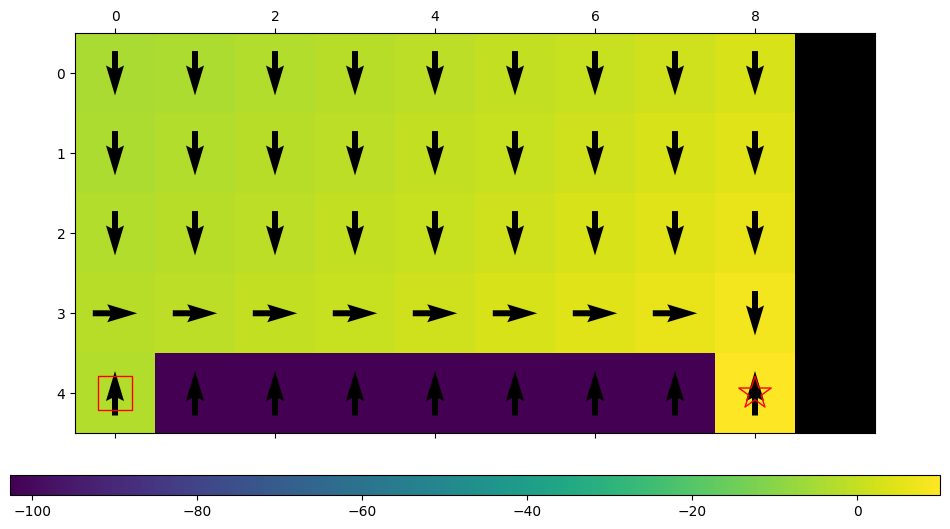

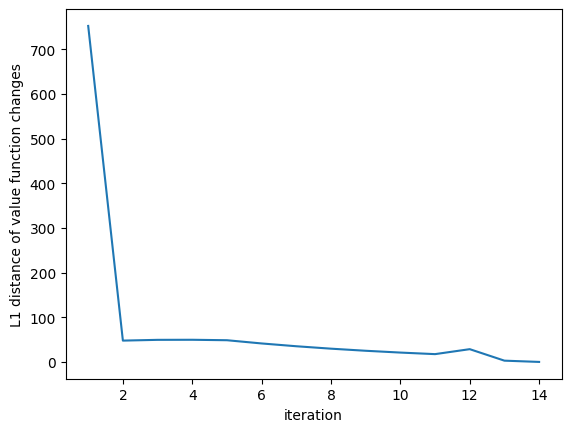

In [9]:
worlds = [grid_world, small_world, cliff_world]
names = ['grid_world', 'small_world', 'cliff_world']
for i, world in enumerate(worlds):
    model = Model(world)
    V_VI, pi_VI, history_VI = value_iteration(model, threshold=0.001)
    plot_vp(model, V_VI, pi_VI)
    plt.savefig('plots/VI-{}.png'.format(names[i]))
    plt.figure()
    plt.plot(np.arange(1, len(history_VI)), [np.sum(np.abs(history_VI[i] - history_VI[i - 1])) for i in range(1, len(history_VI))])
    plt.xlabel('iteration')
    plt.ylabel('L1 distance of value function changes')
    plt.savefig('plots/VI-{}-convergence.png'.format(names[i]))

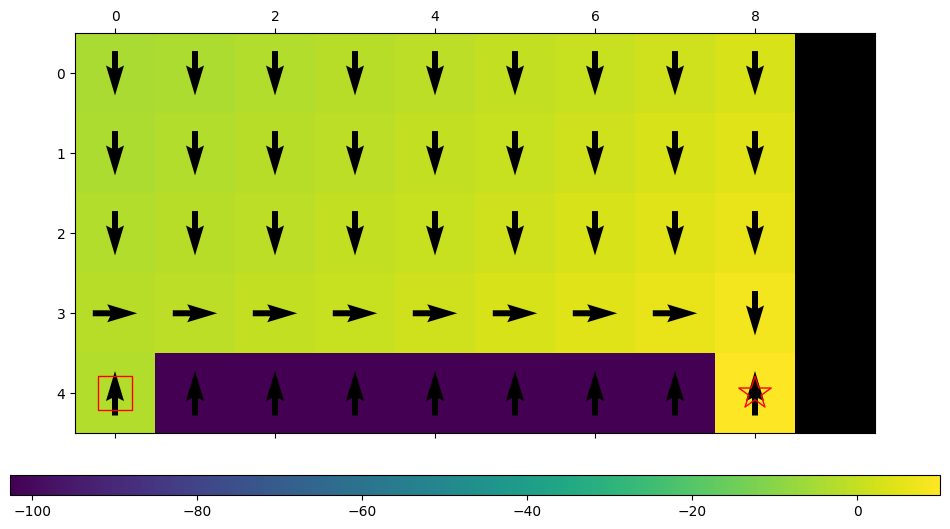

In [10]:
plot_vp(model, V_VI, pi_VI)
plt.savefig('plots/VI-cliff.png')

In [11]:
assert np.all(pi_VI == pi_PI)

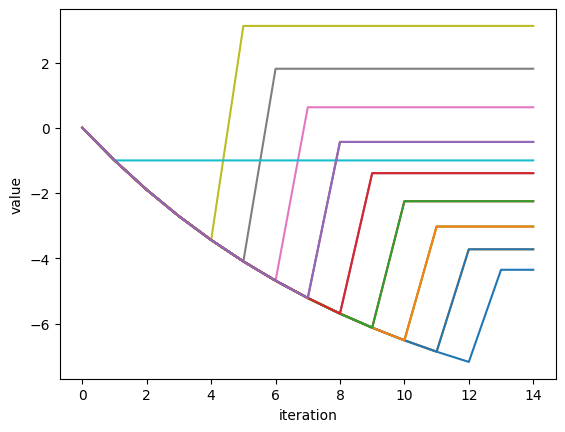

In [12]:
Vs = np.vstack(history_VI)
Vs.shape
for i in range(Vs.shape[0]):
    plt.plot(np.arange(Vs.shape[0]), Vs[:, i])
plt.xlabel('iteration')
plt.ylabel('value')
plt.savefig('plots/Value-iteration-convergence.png')

### 2. Asychonize

 13%|█▎        | 13/100 [00:00<00:04, 21.51it/s]


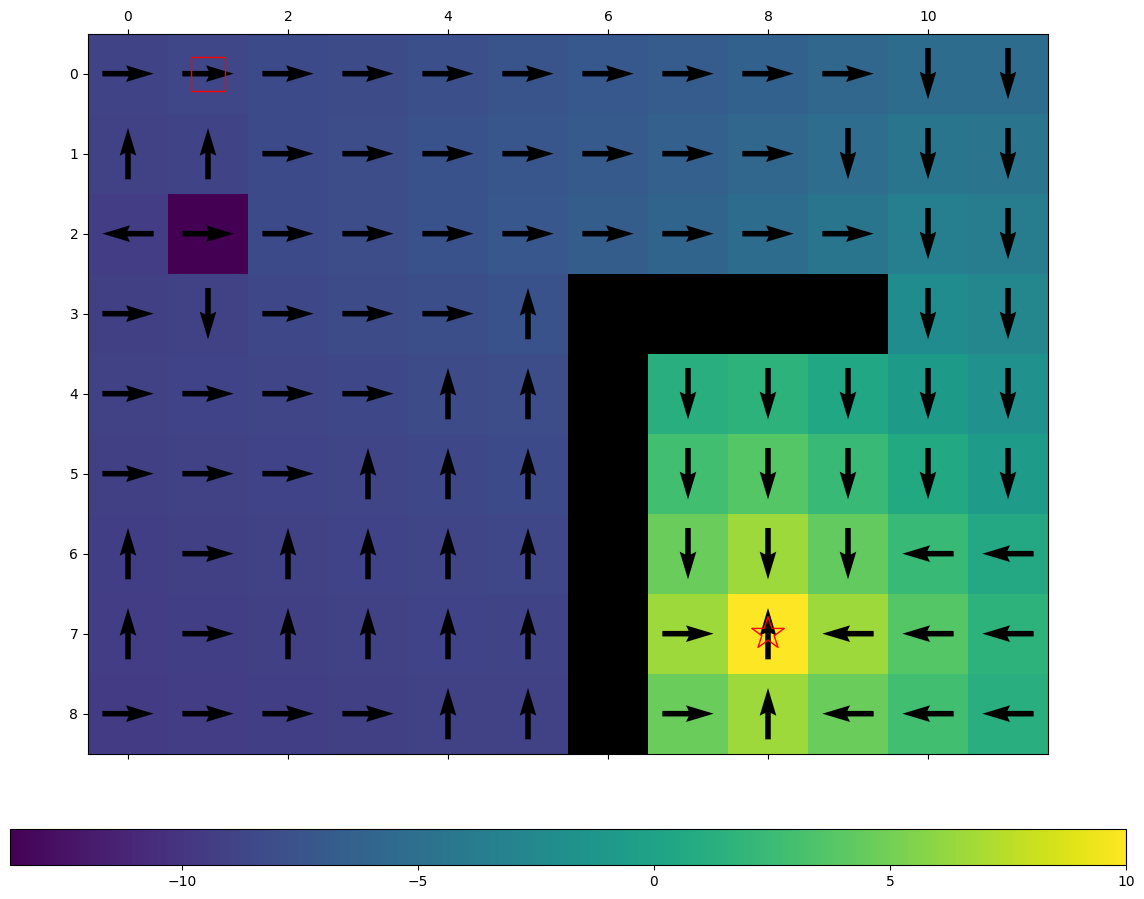

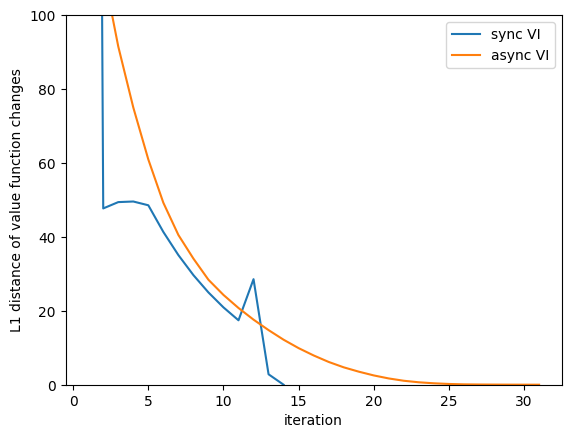

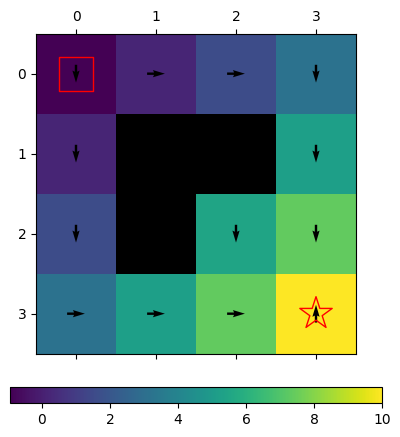

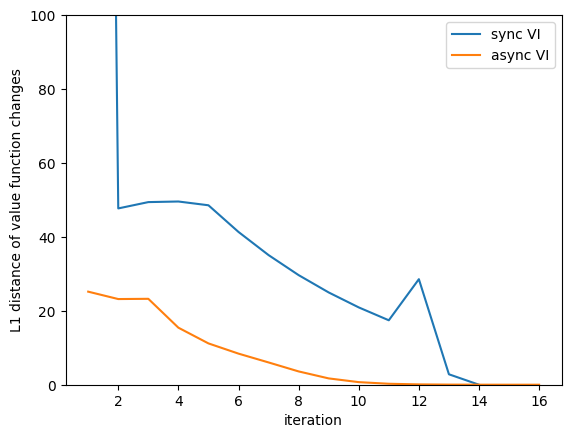

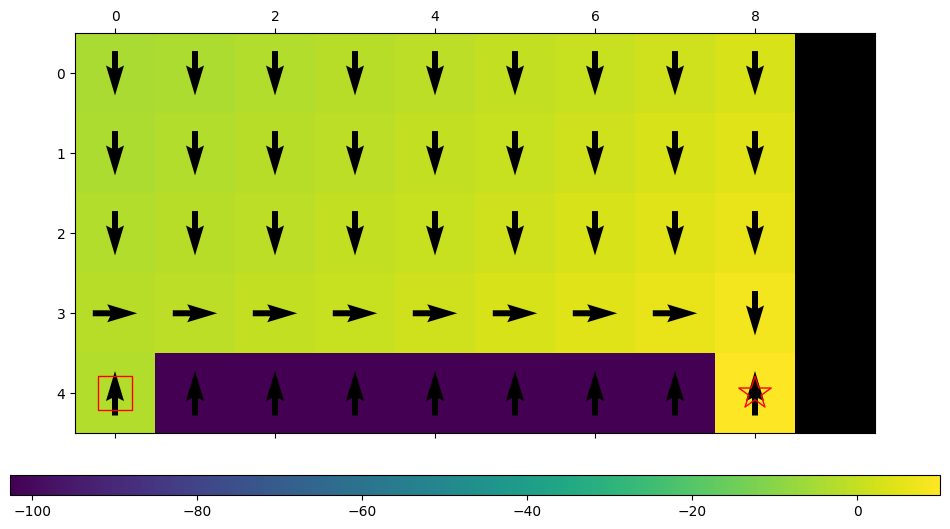

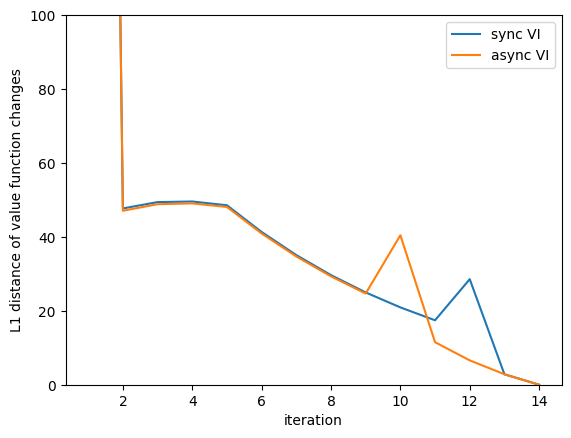

In [13]:
worlds = [grid_world, small_world, cliff_world]
names = ['grid_world', 'small_world', 'cliff_world']
for i, world in enumerate(worlds):
    model = Model(world)
    V_async, pi_async, history_VI_async = value_iteration_async(model, threshold=0.001)
    plot_vp(model, V_async, pi_async)
    plt.savefig('plots/VI-async-{}-convergence.png'.format(names[i]))
    plt.figure()
    plt.plot(np.arange(1, len(history_VI)), [np.sum(np.abs(history_VI[i] - history_VI[i - 1])) for i in range(1, len(history_VI))])
    plt.plot(np.arange(1, len(history_VI_async)), [np.sum(np.abs(history_VI_async[i] - history_VI_async[i - 1])) for i in range(1, len(history_VI_async))])
    plt.xlabel('iteration')
    plt.ylabel('L1 distance of value function changes')
    plt.ylim([0, 100])
    plt.legend(['sync VI', 'async VI'])
    plt.savefig('plots/VI-async-sync-{}-comparison.png'.format(names[i]))

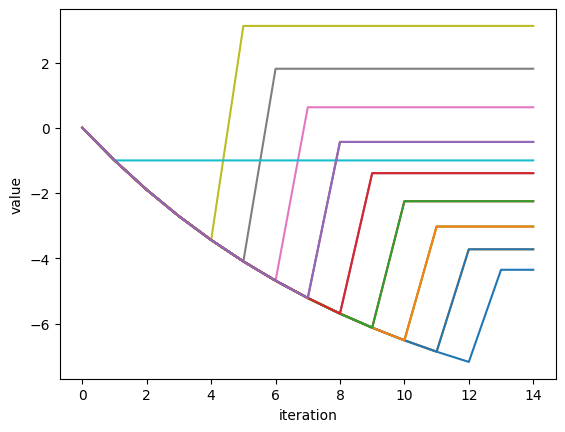

In [14]:
Vs = np.vstack(history_VI_async)
Vs.shape
for i in range(Vs.shape[0]):
    plt.plot(np.arange(Vs.shape[0]), Vs[:, i])
plt.xlabel('iteration')
plt.ylabel('value')
plt.savefig('plots/Async-Value-iteration-convergence.png')

## Q2

### 1. SARSA

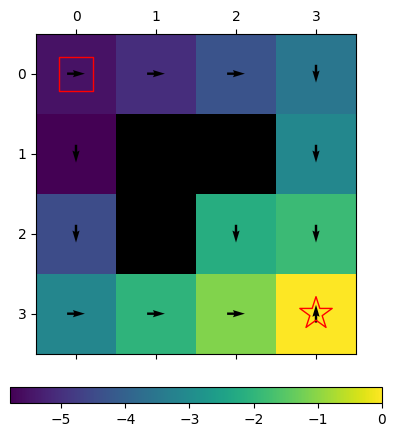

In [77]:
model = Model(small_world)
V, pi, _, history_sarsa = sarsa(model, n_episode=200, alpha=0.5)
plot_vp(model, V, pi)
plt.savefig('plots/sarsa-small.png')

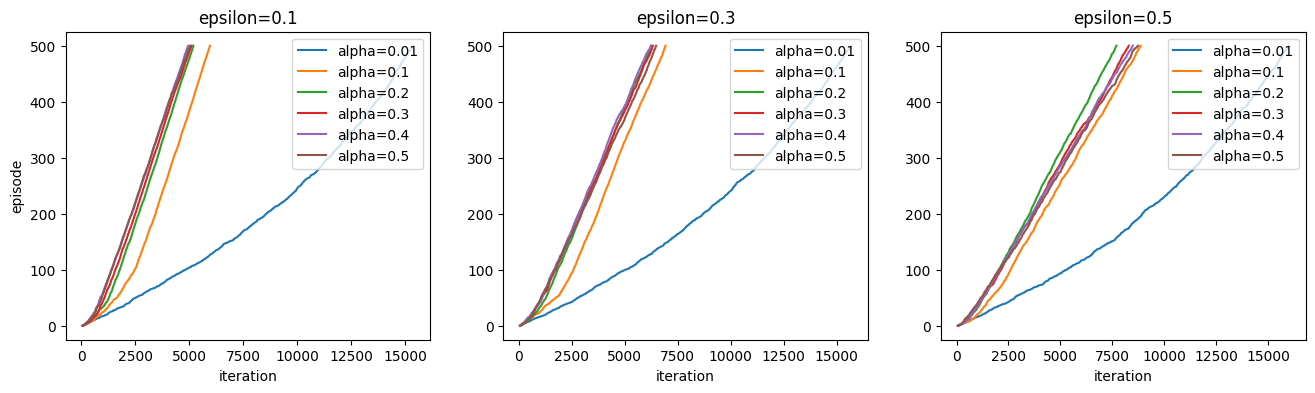

In [63]:
plt.figure(figsize=(16, 4))
eps = [0.1, 0.3, 0.5]
for i, e in enumerate(eps):
    plt.subplot(1, len(eps), i + 1)
    alphas = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    for a in alphas:
        _, _, _, iters = sarsa(model, n_episode=500, alpha=a, epsilon=e)
        # plt.plot(np.arange(1, len(history_sarsa)), uniform_filter1d([np.mean((history_sarsa[i] - history_sarsa[i - 1]) ** 2) for i in range(1, len(history_sarsa))], size=50), alpha=0.9)
        plt.plot(np.cumsum(iters), np.arange(1, len(iters) + 1))
    
    # plt.ylim([0., .05])
    plt.legend(['alpha={}'.format(a) for a in alphas], loc='upper right')
    plt.xlabel('iteration')
    plt.title('epsilon={}'.format(e))
    if i == 0:
        plt.ylabel('episode')
# plt.savefig('plots/sarsa-alphas.png')

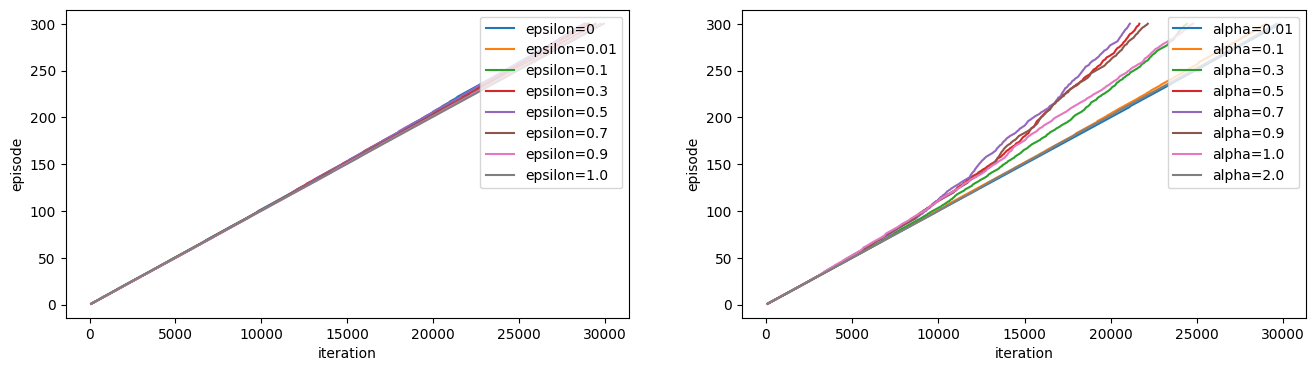

In [6]:
plt.figure(figsize=(16, 4))
model = Model(grid_world)

eps = [0, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
alphas = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 2.0]
plt.subplot(1, 2, 1)
for i, e in enumerate(eps):
    _, _, _, iters = sarsa(model, n_episode=300, alpha=0.1, epsilon=e)
    plt.plot(np.cumsum(iters), np.arange(1, len(iters) + 1))
    plt.legend(['epsilon={}'.format(e) for e in eps], loc='upper right')
    plt.xlabel('iteration')
    plt.ylabel('episode')
plt.subplot(1, 2, 2)
for i, a in enumerate(alphas):
    _, _, _, iters = sarsa(model, n_episode=300, alpha=a, epsilon=0.1)
    plt.plot(np.cumsum(iters), np.arange(1, len(iters) + 1))
    plt.legend(['alpha={}'.format(a) for a in alphas], loc='upper right')
    plt.xlabel('iteration')
    plt.ylabel('episode')

# plt.savefig('plots/sarsa-alphas-eps.png')

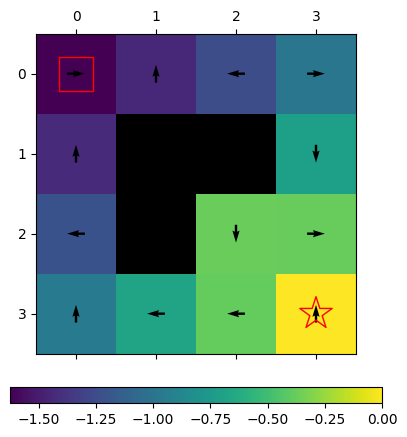

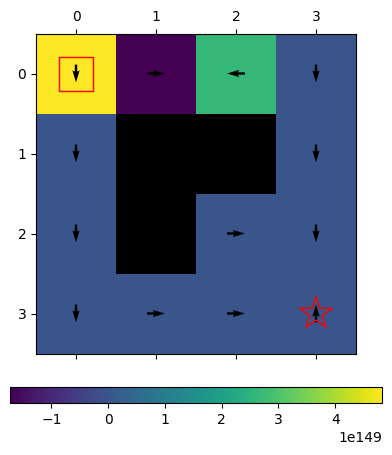

In [21]:
model = Model(small_world)
V, pi, _, history_sarsa = sarsa(model, n_episode=1000, alpha=0.001)
plot_vp(model, V, pi)
plt.savefig('plots/sarsa-small-alpha.png')

model = Model(small_world)
V, pi, _, history_sarsa = sarsa(model, n_episode=1000, alpha=2.0)
plot_vp(model, V, pi)
plt.savefig('plots/sarsa-big-alpha.png')

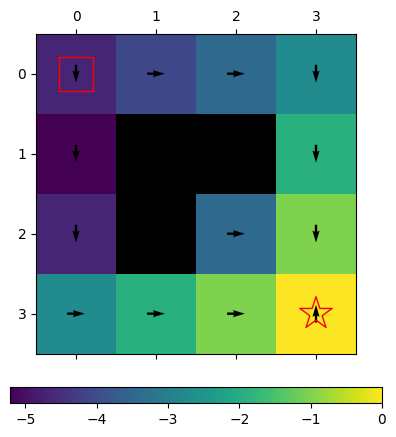

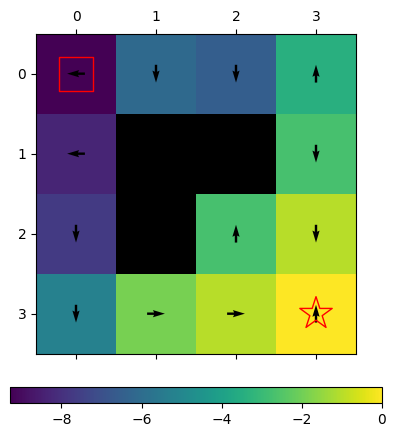

In [7]:
model = Model(small_world)
V, pi, _, history_sarsa = sarsa(model, n_episode=1000, epsilon=0.)
plot_vp(model, V, pi)
plt.savefig('plots/sarsa-small-epsilon.png')

model = Model(small_world)
V, pi, _, history_sarsa = sarsa(model, n_episode=1000, epsilon=1.)
plot_vp(model, V, pi)
plt.savefig('plots/sarsa-large-epsilon.png')

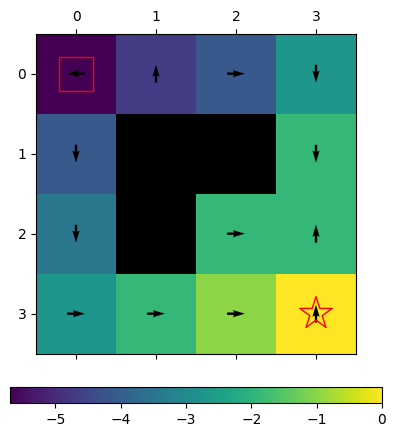

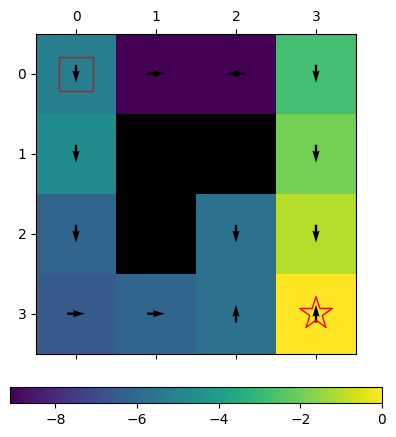

In [8]:
model = Model(small_world)
V, pi, _, history_sarsa = sarsa(model, n_episode=10)
plot_vp(model, V, pi)
plt.savefig('plots/sarsa-small-episode.png')

model = Model(small_world)
V, pi, _, history_sarsa = sarsa(model, n_episode=1000, maxit=10)
plot_vp(model, V, pi)
plt.savefig('plots/sarsa-small-maxit.png')

In [3]:
maxit = [1, 2, 3, 4, 5, 10, 50, 100]
for it in maxit:
    _, _, _, history_sarsa = sarsa(model, n_episode=1000, alpha=0.1, epsilon=0.1, maxit=it)
    plt.plot(np.arange(1, len(history_sarsa)), uniform_filter1d([np.mean((history_sarsa[i] - history_sarsa[i - 1]) ** 2) for i in range(1, len(history_sarsa))], size=10), alpha=0.9)
plt.ylim([0., .01])
plt.legend(['maxit={}'.format(it) for it in maxit], loc='upper right')
plt.xlabel('n_episodes')
plt.title('epsilon={}'.format(e))

NameError: name 'model' is not defined

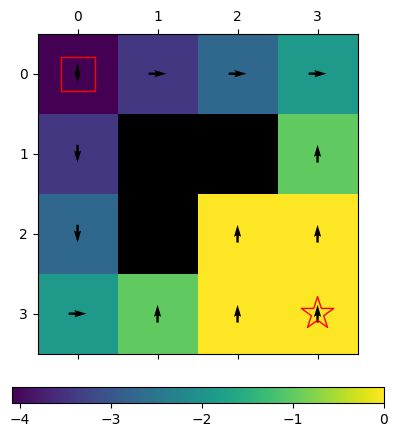

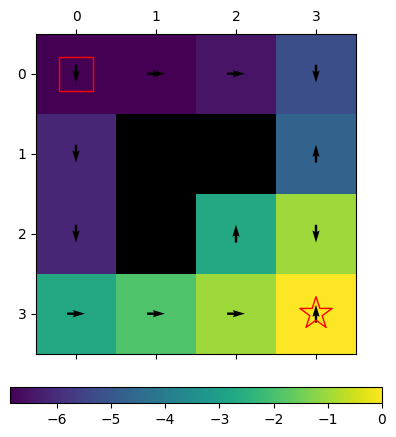

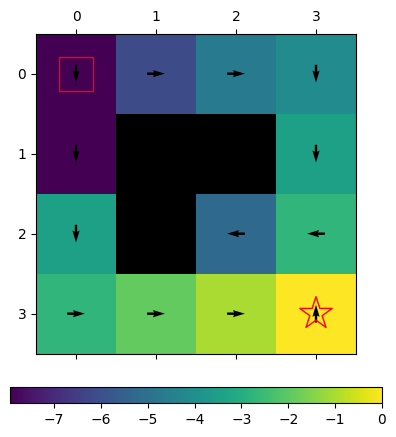

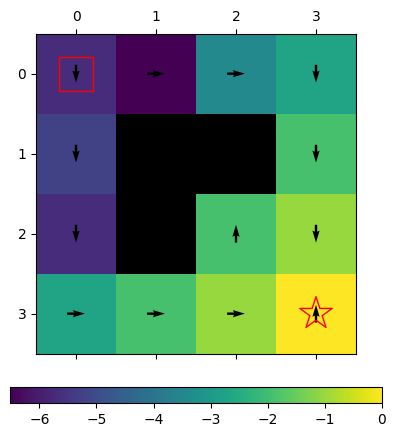

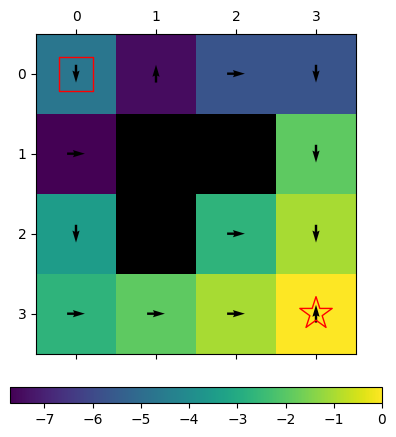

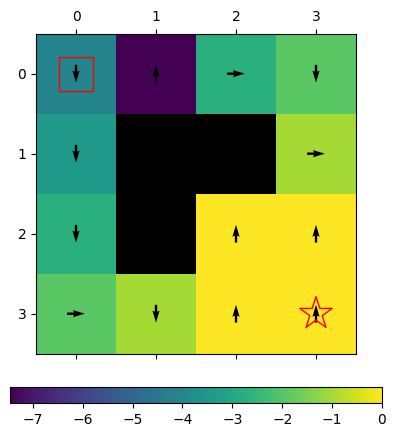

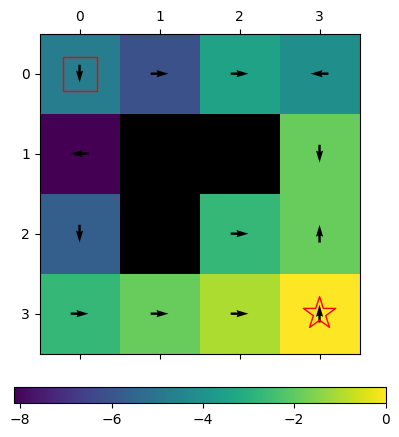

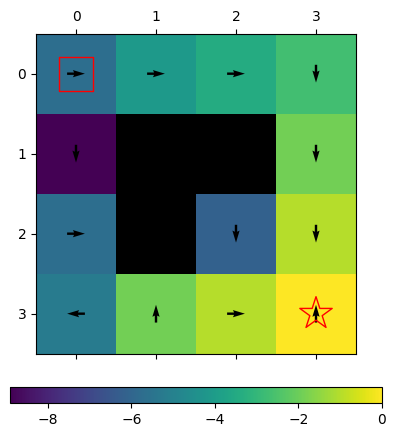

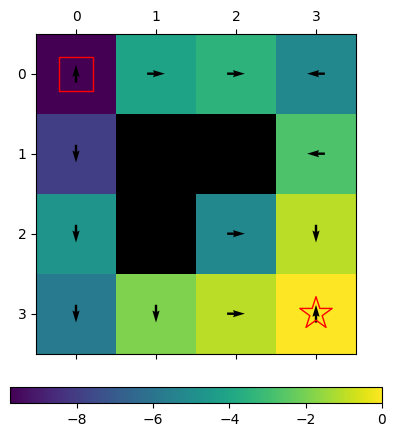

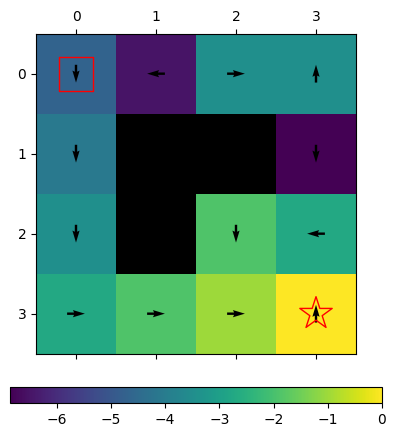

In [51]:
n_episodes = [100, 200]
for n in n_episodes:
    for it in maxit:
        V, pi, _, history_sarsa = sarsa(model, n_episode=n, maxit=it)
        plot_vp(model, V, pi)
        plt.savefig('plots/sarsa-n_episodes={}-maxit={}'.format(n, it))

### Expected-SARSA

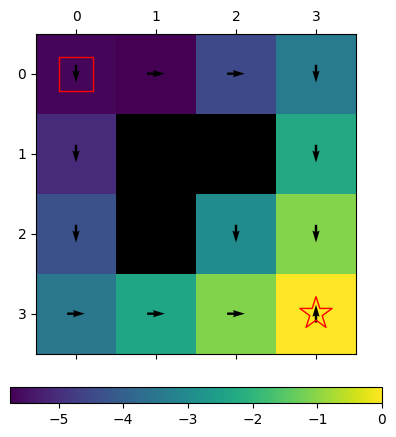

In [3]:
model = Model(small_world)
V, pi, _, history_sarsa = sarsa(model, n_episode=1000, alpha=0.5)
V, pi, _, history_expected_sarsa = expected_sarsa(model, n_episode=1000, alpha=0.5)
plot_vp(model, V, pi)
plt.savefig('plots/expected-sarsa-small.png')

Text(0, 0.5, 'mean L2 changes of Q-value function')

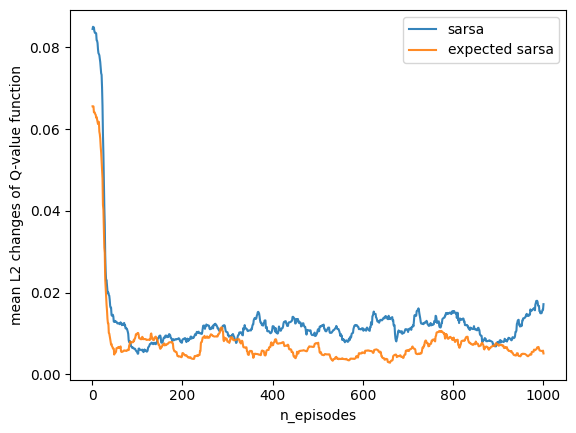

In [66]:
plt.figure()
plt.plot(np.arange(1, len(history_sarsa)), uniform_filter1d([np.mean((history_sarsa[i] - history_sarsa[i - 1]) ** 2) for i in range(1, len(history_sarsa))], size=50), alpha=0.9)
plt.plot(np.arange(1, len(history_expected_sarsa)), uniform_filter1d([np.mean((history_expected_sarsa[i] - history_expected_sarsa[i - 1]) ** 2) for i in range(1, len(history_expected_sarsa))], size=50), alpha=0.9)
plt.legend(['sarsa', 'expected sarsa'])
plt.xlabel('n_episodes')
plt.ylabel('mean L2 changes of Q-value function')

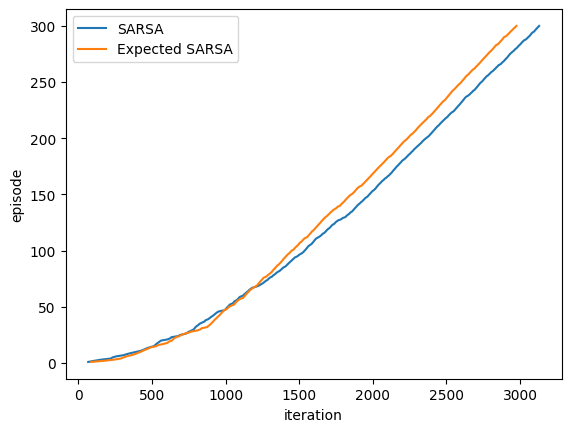

In [5]:
_, _, _, iters = sarsa(model, n_episode=300, alpha=0.3, epsilon=0.01)
plt.plot(np.cumsum(iters), np.arange(1, len(iters) + 1))
_, _, _, iters = expected_sarsa(model, n_episode=300, alpha=0.3, epsilon=0.01)
plt.plot(np.cumsum(iters), np.arange(1, len(iters) + 1))
plt.xlabel('iteration')
plt.ylabel('episode')
plt.legend(['SARSA', 'Expected SARSA'])
plt.savefig('plots/expected-sarsa-efficiency.png')

@Chatbot Arena

In general, Expected SARSA is considered more efficient and converges faster than the regular SARSA algorithm. Here's a comparison of the two:

1. **Convergence Rate**:
   - Expected SARSA typically converges faster than SARSA because it takes into account all possible actions in the next state when updating the value function, rather than just the action chosen by the policy.
   - By considering the expected value over all actions, Expected SARSA can propagate value information more efficiently, leading to faster convergence.

2. **Bias-Variance Trade-off**:
   - SARSA is an on-policy algorithm, which means it updates the value function based on the actions actually taken by the policy. This can lead to high variance in the value estimates, especially in the early stages of learning when the policy is still exploring and changing rapidly.
   - Expected SARSA, on the other hand, is an off-policy algorithm that updates the value function based on the expected value over all possible actions. This can reduce the variance in the value estimates, potentially leading to more stable learning.

3. **Exploration-Exploitation Trade-off**:
   - SARSA can suffer from the exploration-exploitation dilemma, where the agent may get stuck in a suboptimal policy due to insufficient exploration.
   - Expected SARSA, by considering all possible actions, can better handle the exploration-exploitation trade-off, as it updates the value function based on the expected value over all actions, rather than just the action chosen by the policy.

4. **Computational Complexity**:
   - Expected SARSA has a higher computational cost than SARSA because it needs to compute the expected value over all possible actions in the next state, which can be expensive, especially in large state-action spaces.
   - SARSA, on the other hand, only needs to consider the action chosen by the policy, which is computationally cheaper.

5. **Convergence Guarantees**:
   - Both SARSA and Expected SARSA converge to the optimal value function under certain conditions, such as using an appropriate exploration strategy and a decaying learning rate.
   - However, Expected SARSA has stronger theoretical convergence guarantees and is less susceptible to the exploration-exploitation dilemma, which can lead to suboptimal convergence in SARSA.

In summary, while Expected SARSA is generally more efficient and converges faster than SARSA, it comes at the cost of higher computational complexity. The choice between the two algorithms depends on the specific problem, the size of the state-action space, and the trade-off between computational resources and convergence speed. In practice, Expected SARSA is often preferred for its better convergence properties and stability, especially in complex environments or when dealing with large state-action spaces.

## Q3 - Q-Learning

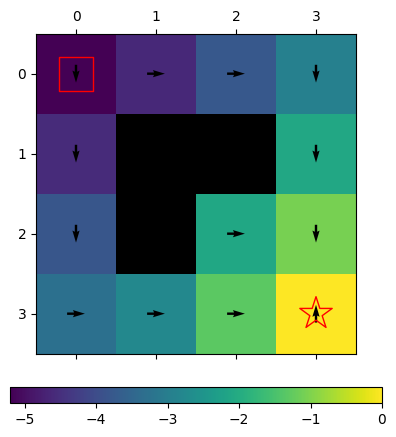

In [3]:
model = Model(small_world)
V, pi, _, _ = q_learning(model, alpha=.5, n_episode=1000)
plot_vp(model, V, pi)
plt.savefig('plots/q-learning-small.png')

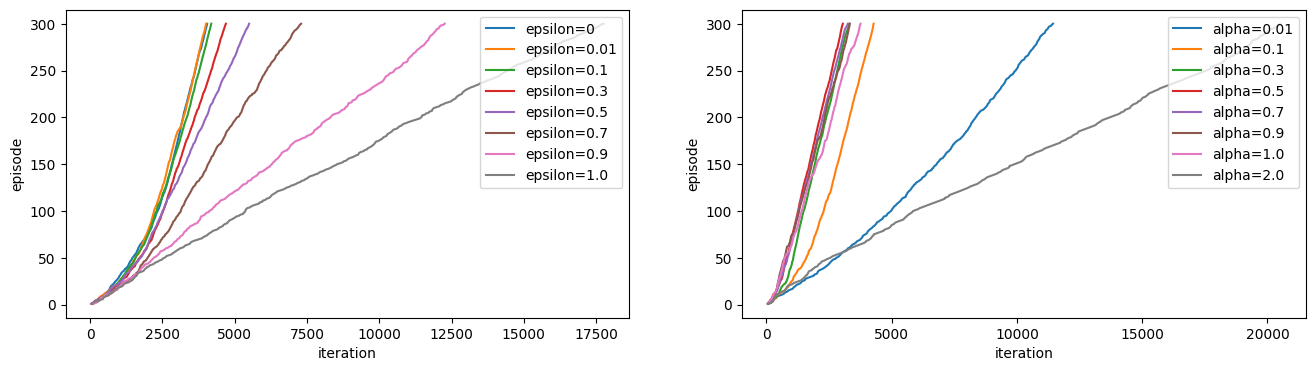

In [5]:
plt.figure(figsize=(16, 4))

eps = [0, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
alphas = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 2.0]
plt.subplot(1, 2, 1)
for i, e in enumerate(eps):
    _, _, _, iters = q_learning(model, n_episode=300, alpha=0.1, epsilon=e)
    plt.plot(np.cumsum(iters), np.arange(1, len(iters) + 1))
    plt.legend(['epsilon={}'.format(e) for e in eps], loc='upper right')
    plt.xlabel('iteration')
    plt.ylabel('episode')
plt.subplot(1, 2, 2)
for i, a in enumerate(alphas):
    _, _, _, iters = q_learning(model, n_episode=300, alpha=a, epsilon=0.1)
    plt.plot(np.cumsum(iters), np.arange(1, len(iters) + 1))
    plt.legend(['alpha={}'.format(a) for a in alphas], loc='upper right')
    plt.xlabel('iteration')
    plt.ylabel('episode')
plt.savefig('plots/q-learning-param.png')

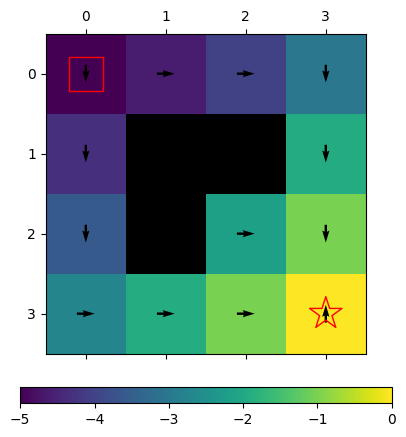

In [6]:
model = Model(small_world)
V, pi, _, _ = q_learning(model, alpha=.5, epsilon=0.01, n_episode=1000)
plot_vp(model, V, pi)
plt.savefig('plots/q-learning-small.png')
V, pi, _, _ = sarsa(model, alpha=.5, epsilon=0.01, n_episode=1000)
plot_vp(model, V, pi)
plt.savefig('plots/sarsa-small.png')

## Q4 - Accumulate Rewards

In [60]:
model = Model(cliff_world)
epsilon = 0.1
alpha = 0.3
n_episode = 1000
n_reps = 200
maxit = 200
cum_r_q_learning = np.zeros(n_episode)
cum_r_sarsa = np.zeros(n_episode)
cum_r_expected_sarsa = np.zeros(n_episode)

for _ in tqdm(range(n_reps)):
    V_q_learning, pi_q_learning, rewards_q_learning = q_learning(model, epsilon=epsilon, alpha=alpha, n_episode=n_episode, maxit=maxit)
    V_sarsa, pi_sarsa, rewards_sarsa, _ = sarsa(model, epsilon=epsilon, alpha=alpha, n_episode=n_episode, maxit=maxit)
    cum_r_q_learning += rewards_q_learning
    cum_r_sarsa += rewards_sarsa
cum_r_q_learning /= n_reps
cum_r_sarsa /= n_reps


  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

Text(0, 0.5, 'Accumulate rewards')

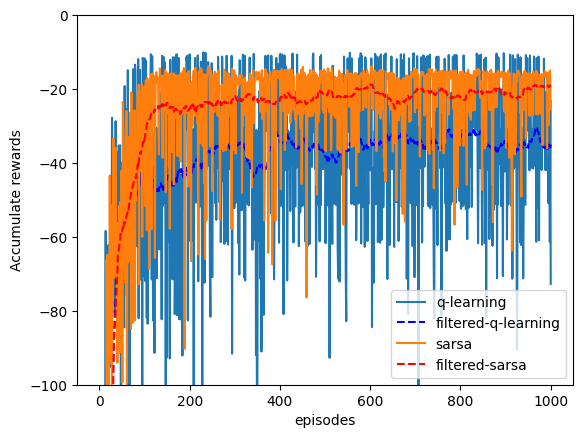

In [59]:
episodes = np.arange(1, n_episode + 1)
plt.plot(episodes, cum_r_q_learning)
plt.plot(episodes, uniform_filter1d(cum_r_q_learning, size=50), 'b--')
plt.plot(episodes, cum_r_sarsa)
plt.plot(episodes, uniform_filter1d(cum_r_sarsa, size=50), 'r--')
plt.legend(['q-learning', 'filtered-q-learning', 'sarsa', 'filtered-sarsa'])
plt.ylim([-100, 0])
plt.xlabel('episodes')
plt.ylabel('Accumulate rewards')
# plt.savefig('plots/cliff-cum-reward.png')

(<Figure size 1200x600 with 2 Axes>, <Axes: >)

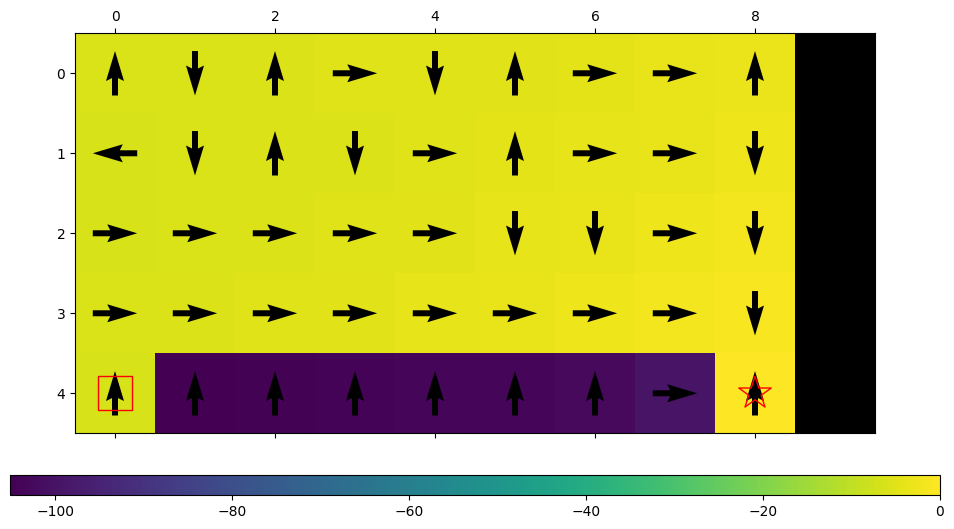

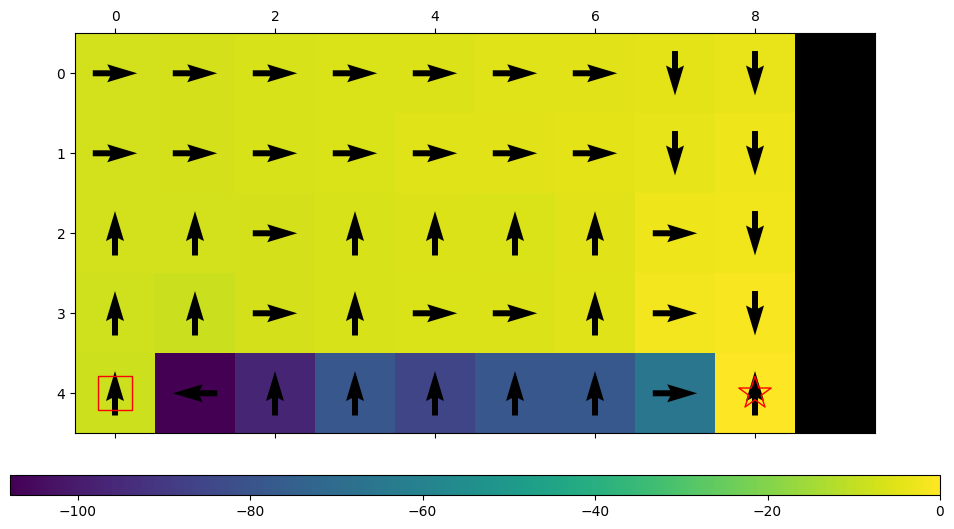

In [13]:
plot_vp(model, V_q_learning, pi_q_learning)
plot_vp(model, V_sarsa, pi_sarsa)

0.20117973905426254

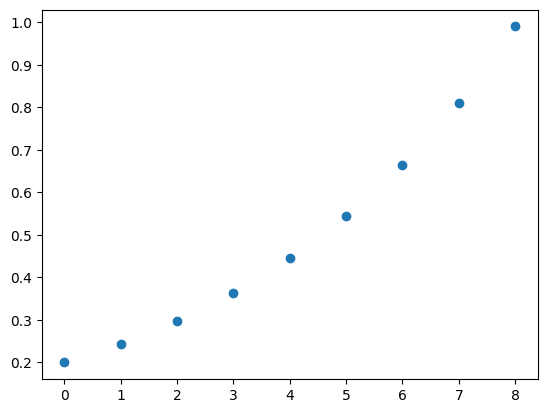

In [18]:
import numpy as np
import matplotlib.pyplot as plt

start = 0.2
rate = 0.2
per = []
for i in range(9):
    per.append(start * np.exp(rate * i))
plt.scatter(np.arange(9), per)
np.log(1.0 / start) / 8